# Load Library

In [1]:
! pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22

In [140]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS/mini project/clicked ads/Clicked Ads Dataset.csv')

In [4]:
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
452,452,80.67,34,412365520.0,239.76,Perempuan,1/1/2016 2:52,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Electronic
348,348,76.20,37,525310450.0,178.51,Perempuan,2/29/2016 19:26,No,Bandar Lampung,Lampung,Electronic
305,305,79.81,24,393361920.0,178.85,Laki-Laki,5/31/2016 11:44,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Finance
173,173,74.41,26,450770950.0,163.05,Perempuan,7/23/2016 4:37,No,Banjarmasin,Kalimantan Selatan,House
599,599,38.63,48,404439770.0,222.11,Perempuan,4/7/2016 10:51,Yes,Balikpapan,Kalimantan Timur,Bank


In [5]:
df.drop(columns='Unnamed: 0', axis = 1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


## Statistical analysis

In [7]:
cat = df.select_dtypes(include=['object']).columns.to_numpy()
num = df.select_dtypes(include=['int64', 'float64']).columns.to_numpy()

In [8]:
df[cat].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [9]:
df[num].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


## Univariate Analysis

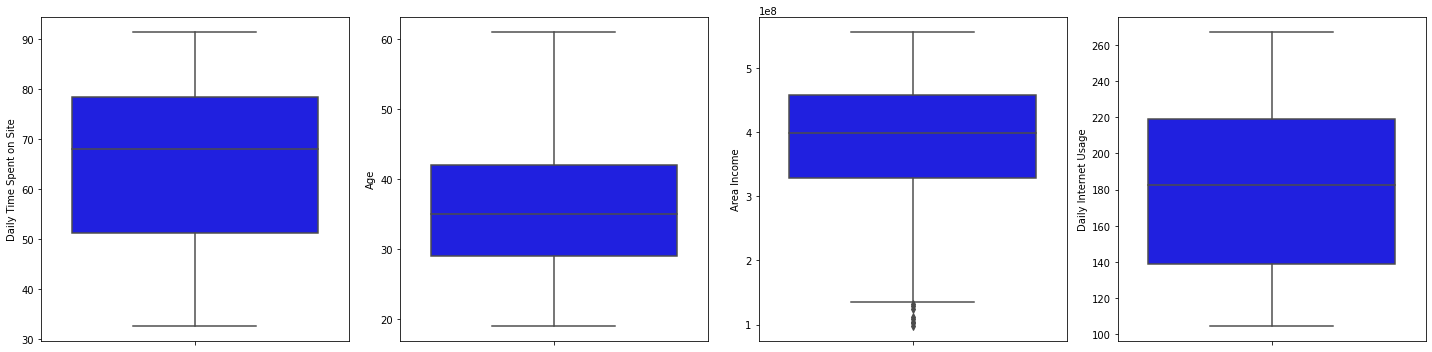

In [10]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

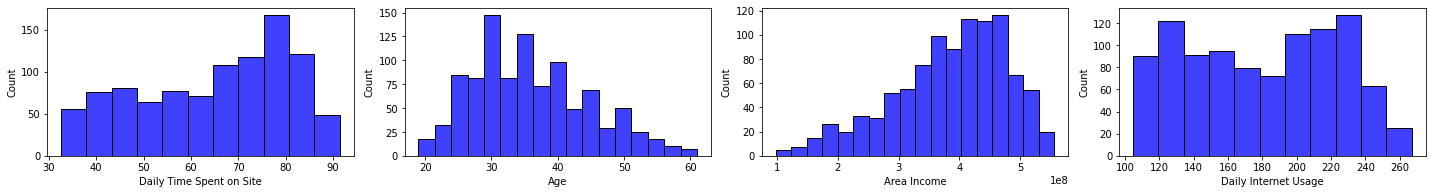

In [11]:
plt.figure(figsize=(20, 5))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.histplot(df[num[i]], color='blue')
    plt.tight_layout()
plt.show()

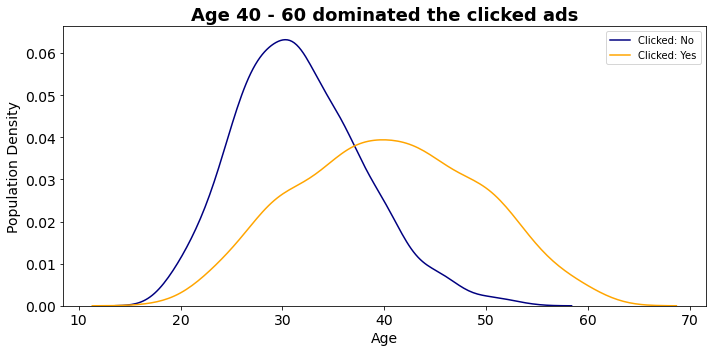

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Clicked on Ad'] == 'No']['Age'].dropna(), color= 'navy', label= 'Clicked: No', ax=ax)
sns.kdeplot(df[df['Clicked on Ad'] == 'Yes']['Age'].dropna(), color= 'orange', label= 'Clicked: Yes', ax=ax)

ax.set_title('Age 40 - 60 dominated the clicked ads',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Age', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylabel('Population Density')
plt.legend()

plt.tight_layout()

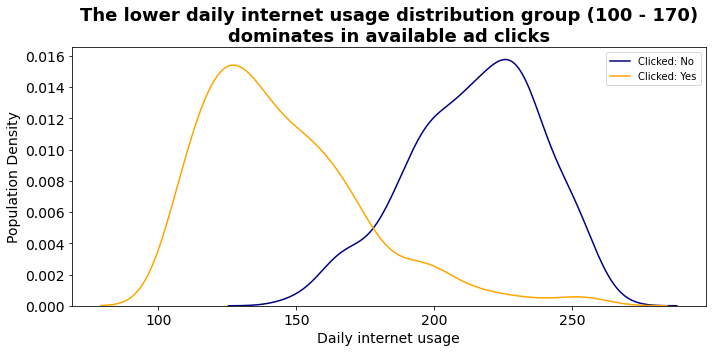

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Clicked on Ad'] == 'No']['Daily Internet Usage'].dropna(), color= 'navy', label= 'Clicked: No', ax=ax)
sns.kdeplot(df[df['Clicked on Ad'] == 'Yes']['Daily Internet Usage'].dropna(), color= 'orange', label= 'Clicked: Yes', ax=ax)

ax.set_title('The lower daily internet usage distribution group (100 - 170)\ndominates in available ad clicks',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Daily internet usage', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylabel('Population Density')
plt.legend()

plt.tight_layout()

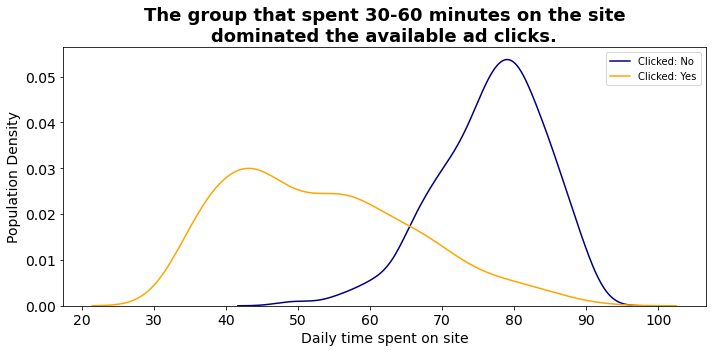

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Clicked on Ad'] == 'No']['Daily Time Spent on Site'].dropna(), color= 'navy', label= 'Clicked: No', ax=ax)
sns.kdeplot(df[df['Clicked on Ad'] == 'Yes']['Daily Time Spent on Site'].dropna(), color= 'orange', label= 'Clicked: Yes', ax=ax)

ax.set_title('The group that spent 30-60 minutes on the site\ndominated the available ad clicks.',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Daily time spent on site', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylabel('Population Density')
plt.legend()

plt.tight_layout()

- age 40 - 60 being the group that dominates clicking on available ads.
- The lower daily internet usage distribution group (100 - 170) dominates in available ad clicks.
- The group that spent 30-60 minutes on the site dominated the available ad clicks.

## Bivariate Analysis

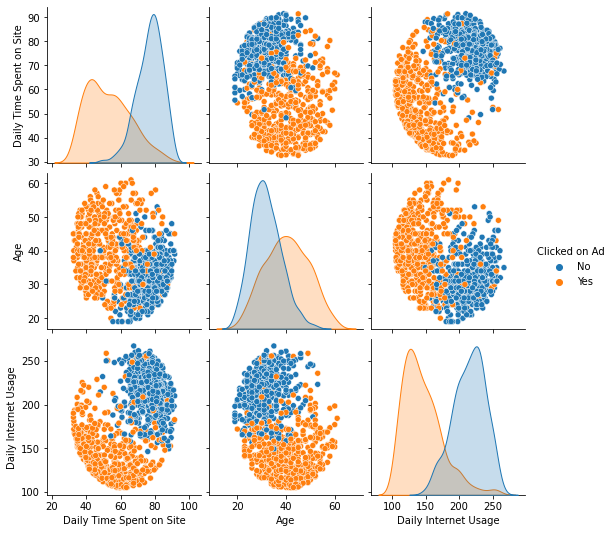

In [15]:
num1 = ['Daily Time Spent on Site', 'Age',
       'Daily Internet Usage', 'Clicked on Ad']


sns.pairplot(df[num1], diag_kind='kde', hue='Clicked on Ad')
plt.show()

- customers who have high values of daily internet usage and daily time spent on site are less likely to click on available ads.
- customers who are < 40 and have a high daily time spent on site and also high daily internet usage value are less likely to click on available ads.


## Multivariate Analysis

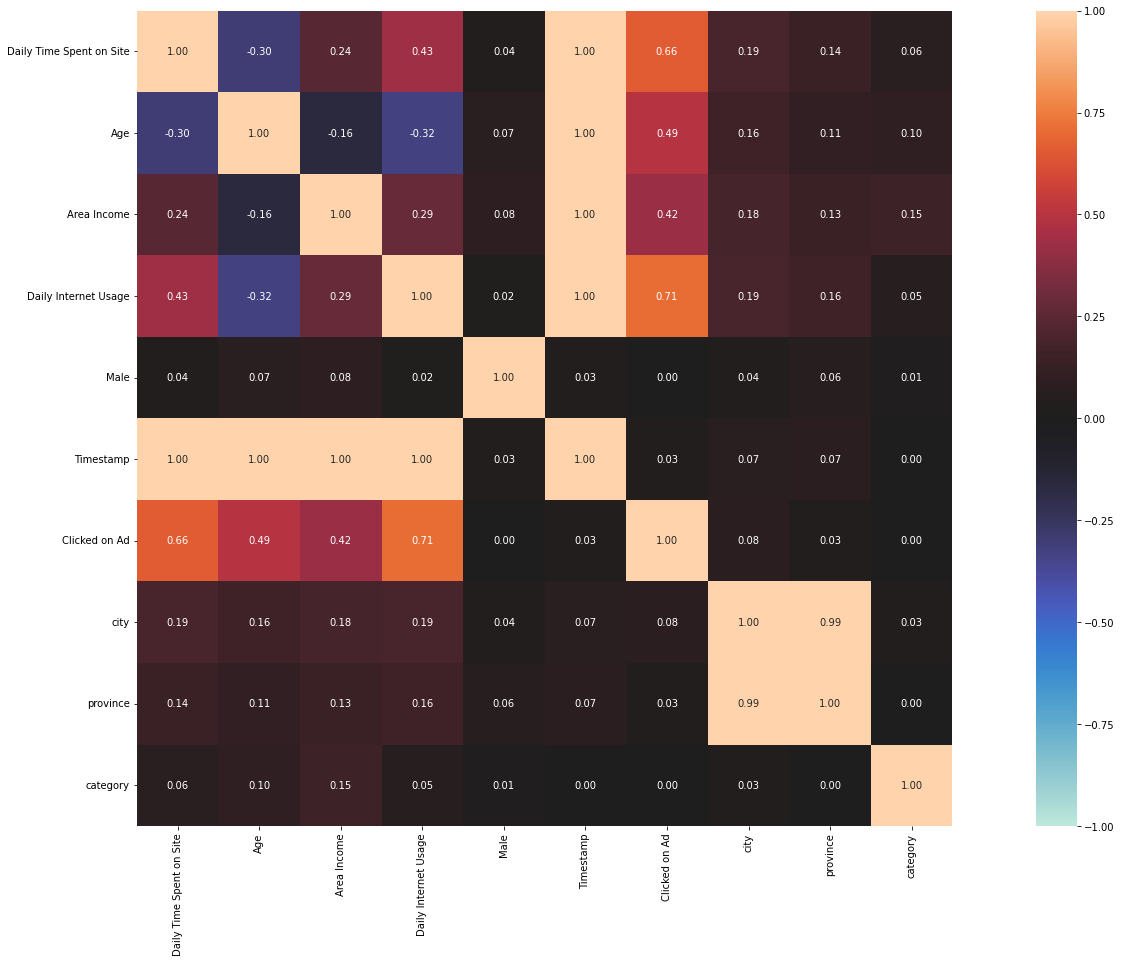

In [16]:
from dython.nominal import associations
fig, ax = plt.subplots(figsize=(30, 15))
associations(df, ax=ax);

- daily time spent on site, age, area income, ad daily internet usage have the highest correlation to clicked on ads column.

# Data Cleaning & Preprocessing

In [17]:
df1 = df.copy()

In [18]:
df1.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [19]:
df1.dropna(inplace = True)

In [20]:
df1.duplicated().any()

False

In [21]:
df1['Male'].value_counts()

Perempuan    502
Laki-Laki    461
Name: Male, dtype: int64

In [22]:
df1.rename(columns={'Male' : 'Gender'}, inplace=True)

In [23]:
from datetime import datetime as dt

df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['year'] = df1['Timestamp'].dt.year
df1['month'] = df1['Timestamp'].dt.month
df1['day'] = df1['Timestamp'].dt.day
df1['week'] = df1['Timestamp'].dt.week

df1.drop(columns=['Timestamp', 'city', 'province', 'category'], axis = 1, inplace=True)

<ipython-input-23-08ae56878f24>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['week'] = df1['Timestamp'].dt.week


In [24]:
df1[['year', 'month', 'day', 'week']].sample(5)

,year,month,day,week
386,2016,6,3,22
287,2016,6,28,26
388,2016,2,5,5
809,2016,4,29,17
461,2016,4,30,17


In [25]:
df1 = pd.get_dummies(df1, prefix=['Gender'], columns=['Gender'], drop_first= False)

In [26]:
df1['Clicked on Ad'].value_counts()

Yes    485
No     478
Name: Clicked on Ad, dtype: int64

In [27]:
mapping = {'Yes': 1, 'No': 0}

df1['Clicked on Ad'] = df1['Clicked on Ad'].map(mapping)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  963 non-null    float64
 1   Age                       963 non-null    int64  
 2   Area Income               963 non-null    float64
 3   Daily Internet Usage      963 non-null    float64
 4   Clicked on Ad             963 non-null    int64  
 5   year                      963 non-null    int64  
 6   month                     963 non-null    int64  
 7   day                       963 non-null    int64  
 8   week                      963 non-null    int64  
 9   Gender_Laki-Laki          963 non-null    uint8  
 10  Gender_Perempuan          963 non-null    uint8  
dtypes: float64(3), int64(6), uint8(2)
memory usage: 77.1 KB


In [29]:
X = df1.drop(columns='Clicked on Ad', axis = 1)
y = df1['Clicked on Ad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    #score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    #print('roc_auc (crossval train-mean): '+ str(score['train_score'].mean()))
    #print('roc_auc (crossval test-mean): '+ str(score['test_score'].mean()))
    #print('roc_auc (crossval train-std): '+ str(score['train_score'].std()))
    #print('roc_auc (crossval test-std): '+ str(score['test_score'].std()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [31]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.67
Recall (Test Set): 0.61
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.85


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.92
Recall (Test Set): 0.97
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.94
Recall (Test Set): 0.98
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00


In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
eval_classification(nb)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.76
Recall (Test Set): 0.60
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.78


In [35]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.94
Recall (Test Set): 0.98
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00


In [36]:
from sklearn.preprocessing import MinMaxScaler

def norm(df) :
  for i in df1 :
    df1[i] = MinMaxScaler().fit_transform(df1[i].values.reshape(len(df),1))
  return df

X_norm = norm(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.3, random_state=42)

In [38]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.67
Recall (Test Set): 0.61
F1-Score (Test Set): 0.64
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.85


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.91
Recall (Test Set): 0.97
F1-Score (Test Set): 0.94
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.94
Recall (Test Set): 0.98
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00


In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
eval_classification(nb)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.76
Recall (Test Set): 0.60
F1-Score (Test Set): 0.67
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.78


In [42]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.94
Recall (Test Set): 0.98
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00


In [43]:
y_predicted = xg.predict(X_test)
y_predicted

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_predicted, labels=[1,0])

array([[142,   3],
       [  9, 135]])

In [45]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       144
           1       0.94      0.98      0.96       145

    accuracy                           0.96       289
   macro avg       0.96      0.96      0.96       289
weighted avg       0.96      0.96      0.96       289



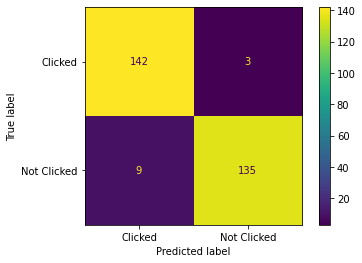

In [46]:
from sklearn import metrics
cm = confusion_matrix(y_test,y_predicted, labels=[1,0])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Clicked','Not Clicked'])

cm_display.plot()
plt.show()

In [47]:
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {
                   'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                   'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                   'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                   'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                   'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                   'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                   'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],                  
                   'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]                    
                   }

xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, n_jobs=1)
xg_tuned.fit(X_train ,y_train)

y_pred = xg_tuned.predict(X_train)
eval_classification(xg_tuned)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.94
Recall (Test Set): 0.97
F1-Score (Test Set): 0.95
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00


<Axes: >

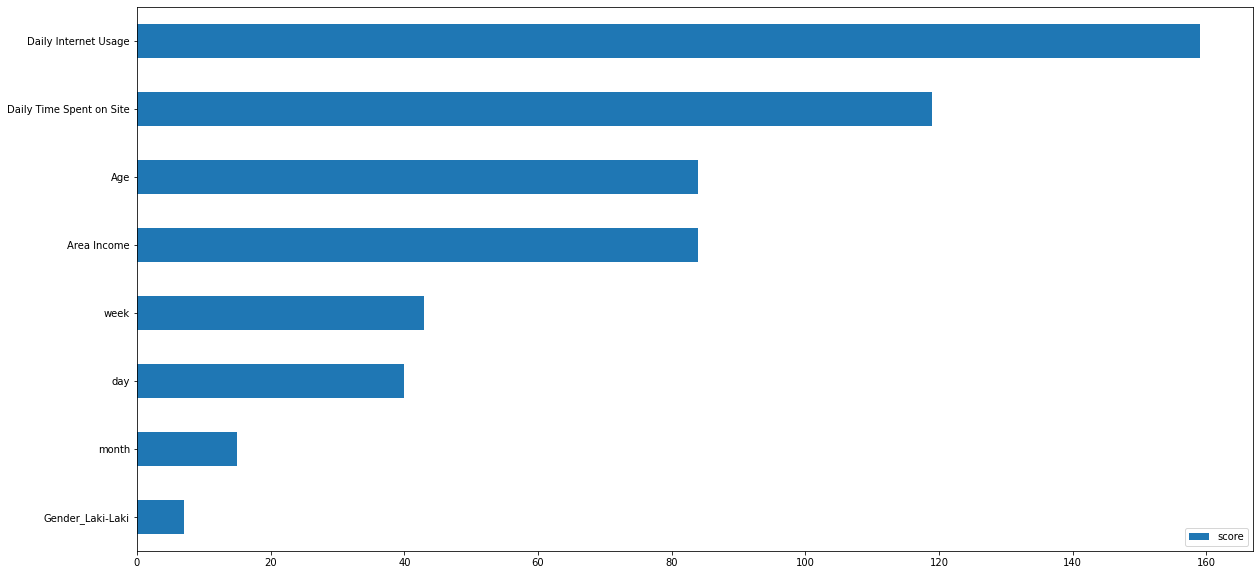

In [54]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
feature_important = xg.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").sort_values('score', ascending=True).plot(kind='barh', figsize = (20,10))